In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
y_train = y_train.reshape(-1, 1)

In [0]:
y_test = y_test.reshape(-1, 1)

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [8]:
y_train_onehot = enc.transform(y_train).toarray()
y_train_onehot = np.array(y_train_onehot, dtype="float32")
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
y_test_onehot = enc.transform(y_test).toarray()
y_test_onehot = np.array(y_test_onehot, dtype="float32")
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(28, 28, 1), activation="relu", padding="SAME"))

In [0]:
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="SAME"))

In [13]:
model.add(MaxPooling2D(pool_size=2, strides=1, padding="SAME"))

In [0]:
model.add(Flatten())
model.add(Dense(512, activation="relu"))

In [0]:
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
__________________________________________

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [18]:
model.fit(X_train, y_train_onehot, epochs=5, batch_size=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 41s 678us/step - loss: 0.1017 - acc: 0.9682
Epoch 2/5
60000/60000 [==============================] - 26s 438us/step - loss: 0.0301 - acc: 0.9907
Epoch 3/5
60000/60000 [==============================] - 26s 436us/step - loss: 0.0165 - acc: 0.9947
Epoch 4/5
60000/60000 [==============================] - 26s 437us/step - loss: 0.0112 - acc: 0.9963
Epoch 5/5
60000/60000 [==============================] - 26s 436us/step - loss: 0.0100 - acc: 0.9964


In [20]:
predict = model.predict(X_test.reshape(-1, 28, 28, 1))
predict

array([[2.19465223e-12, 4.46483822e-11, 8.63417782e-09, ...,
        9.99999881e-01, 1.72345527e-10, 1.31427347e-09],
       [3.03812336e-12, 2.89145308e-09, 1.00000000e+00, ...,
        3.38327558e-17, 5.25717639e-14, 1.55223722e-15],
       [1.84221292e-07, 9.99969125e-01, 2.14621343e-09, ...,
        2.35573975e-06, 1.46118482e-05, 1.10699830e-05],
       ...,
       [6.44993355e-17, 1.03124276e-13, 5.62895480e-16, ...,
        2.79812978e-12, 3.61120698e-08, 1.04438436e-09],
       [1.19001829e-16, 3.75370652e-20, 7.51482342e-20, ...,
        2.93261964e-17, 6.40242095e-11, 1.08999070e-17],
       [4.87098122e-12, 2.82173001e-14, 2.39696717e-12, ...,
        2.04713938e-20, 2.25955854e-09, 2.31035877e-14]], dtype=float32)

In [21]:
predict01 = np.argmax(predict, 1)
target = np.argmax(y_test_onehot, 1)

predict02 = (predict01 == target)
acc = np.sum(predict02) / len(predict02)
acc

0.9903

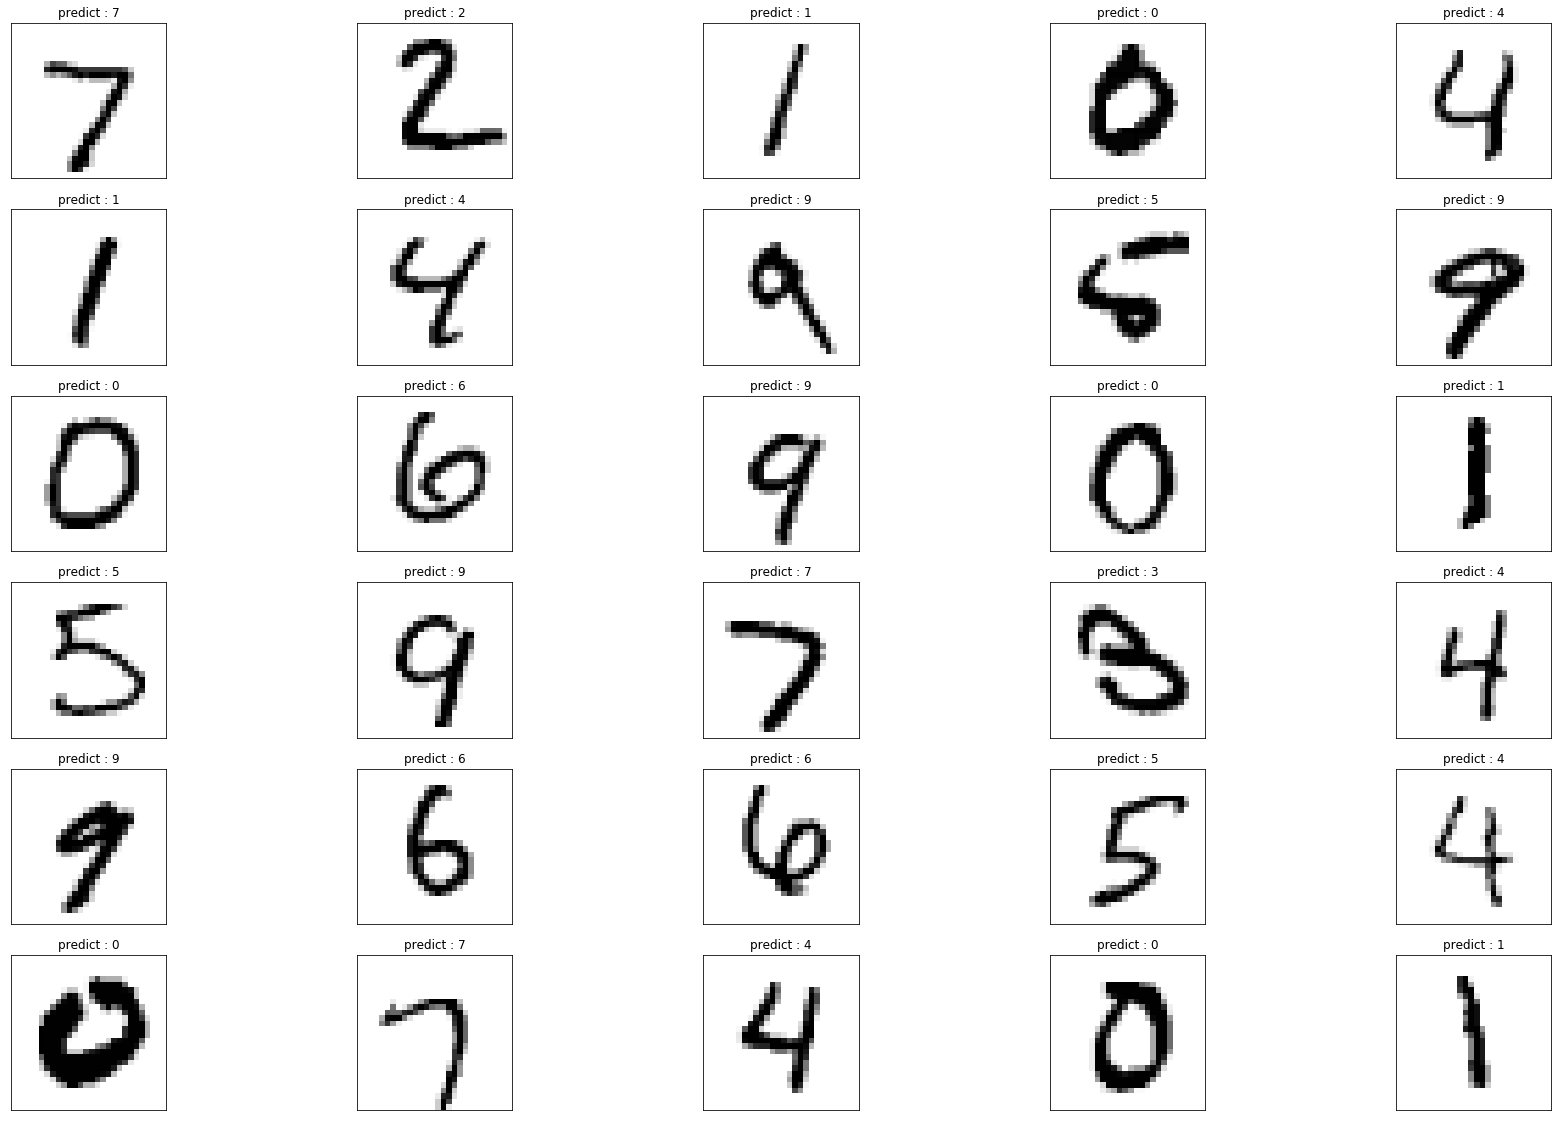

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 20))
for i in range(30):
  subplot = fig.add_subplot(6, 5, i+1)

  subplot.set_xticks([])

  subplot.set_yticks([])

  subplot.set_title('predict : %d' %predict01[i])

  subplot.imshow(X_test[i].reshape((28, 28)),
                 cmap=plt.cm.gray_r)
  
plt.show()